<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/LGBM_Clasificaci%C3%B3n_utilizando_LightGBM_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Clasificación utilizando LightGBM (LGBM) (Core)**


**Objetivo**

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando LightGBM (LGBM). Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset:** [Loan Prediction Dataset](https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/blob/master/train.csv)

**Descripción del Dataset:** El dataset de predicción de préstamos contiene información sobre solicitantes de préstamos, como sus ingresos, historial crediticio y otras características personales. El objetivo es predecir si un solicitante será aprobado para un préstamo basándose en estos factores.

**Instrucciones:**

**Parte 1: Carga y Exploración Inicial de Datos**

1.  **Carga del Dataset:**
* Cargar el dataset desde Kaggle.
2.  **Exploración Inicial:**
* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

**Parte 2: Análisis Exploratorio de Datos (EDA)**

1.  **Análisis Estadístico Descriptivo:**
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.
2.  **Visualizaciones:**
* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.
3.  **Valores Faltantes y Outliers:**
* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

**Parte 3: Preprocesamiento de Datos**

1.  **Transformación de Columnas:**
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.
2.  **División del Conjunto de Datos:**
* Dividir el dataset en conjuntos de entrenamiento y prueba.

**Parte 4: Implementación de LightGBM (LGBM)**

1.  **Entrenamiento del Modelo:**
* Entrenar un modelo de LGBM con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.
2.  **Optimización de Hiperparámetros:**
* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de LGBM.
3.  **Evaluación del Modelo Optimizado:**
* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Estadísticas Descriptivas Básicas:
           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.24

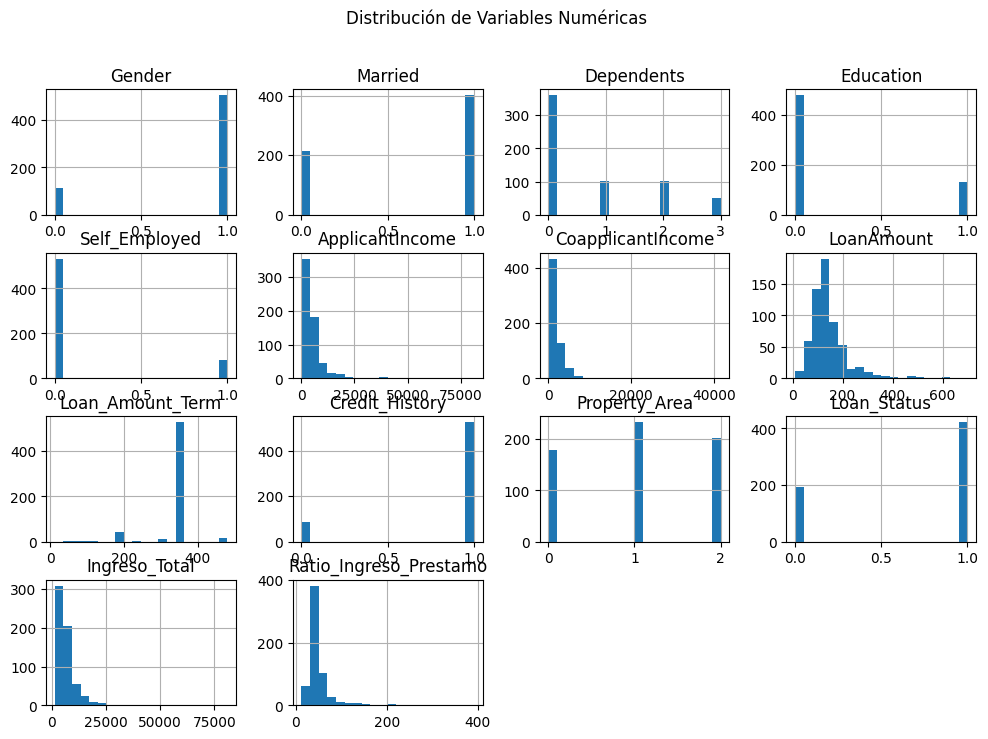

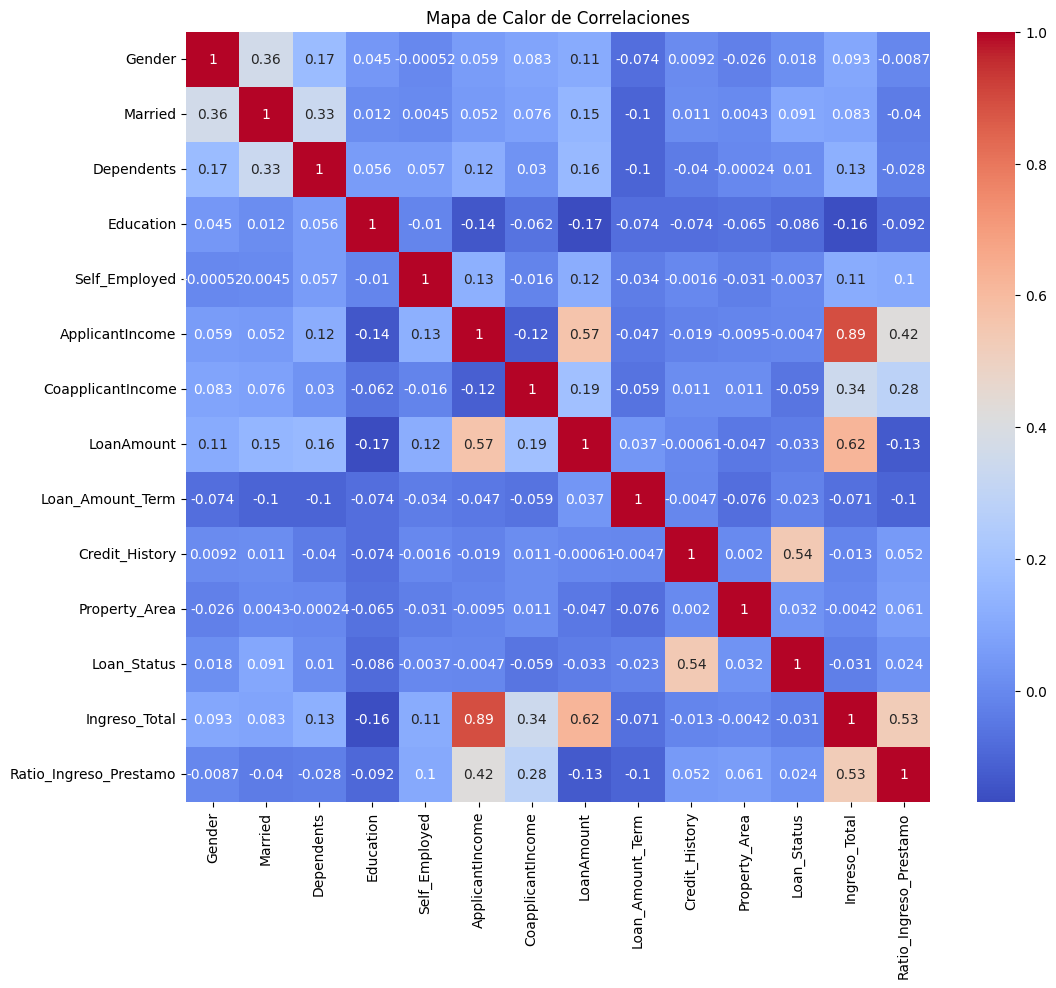

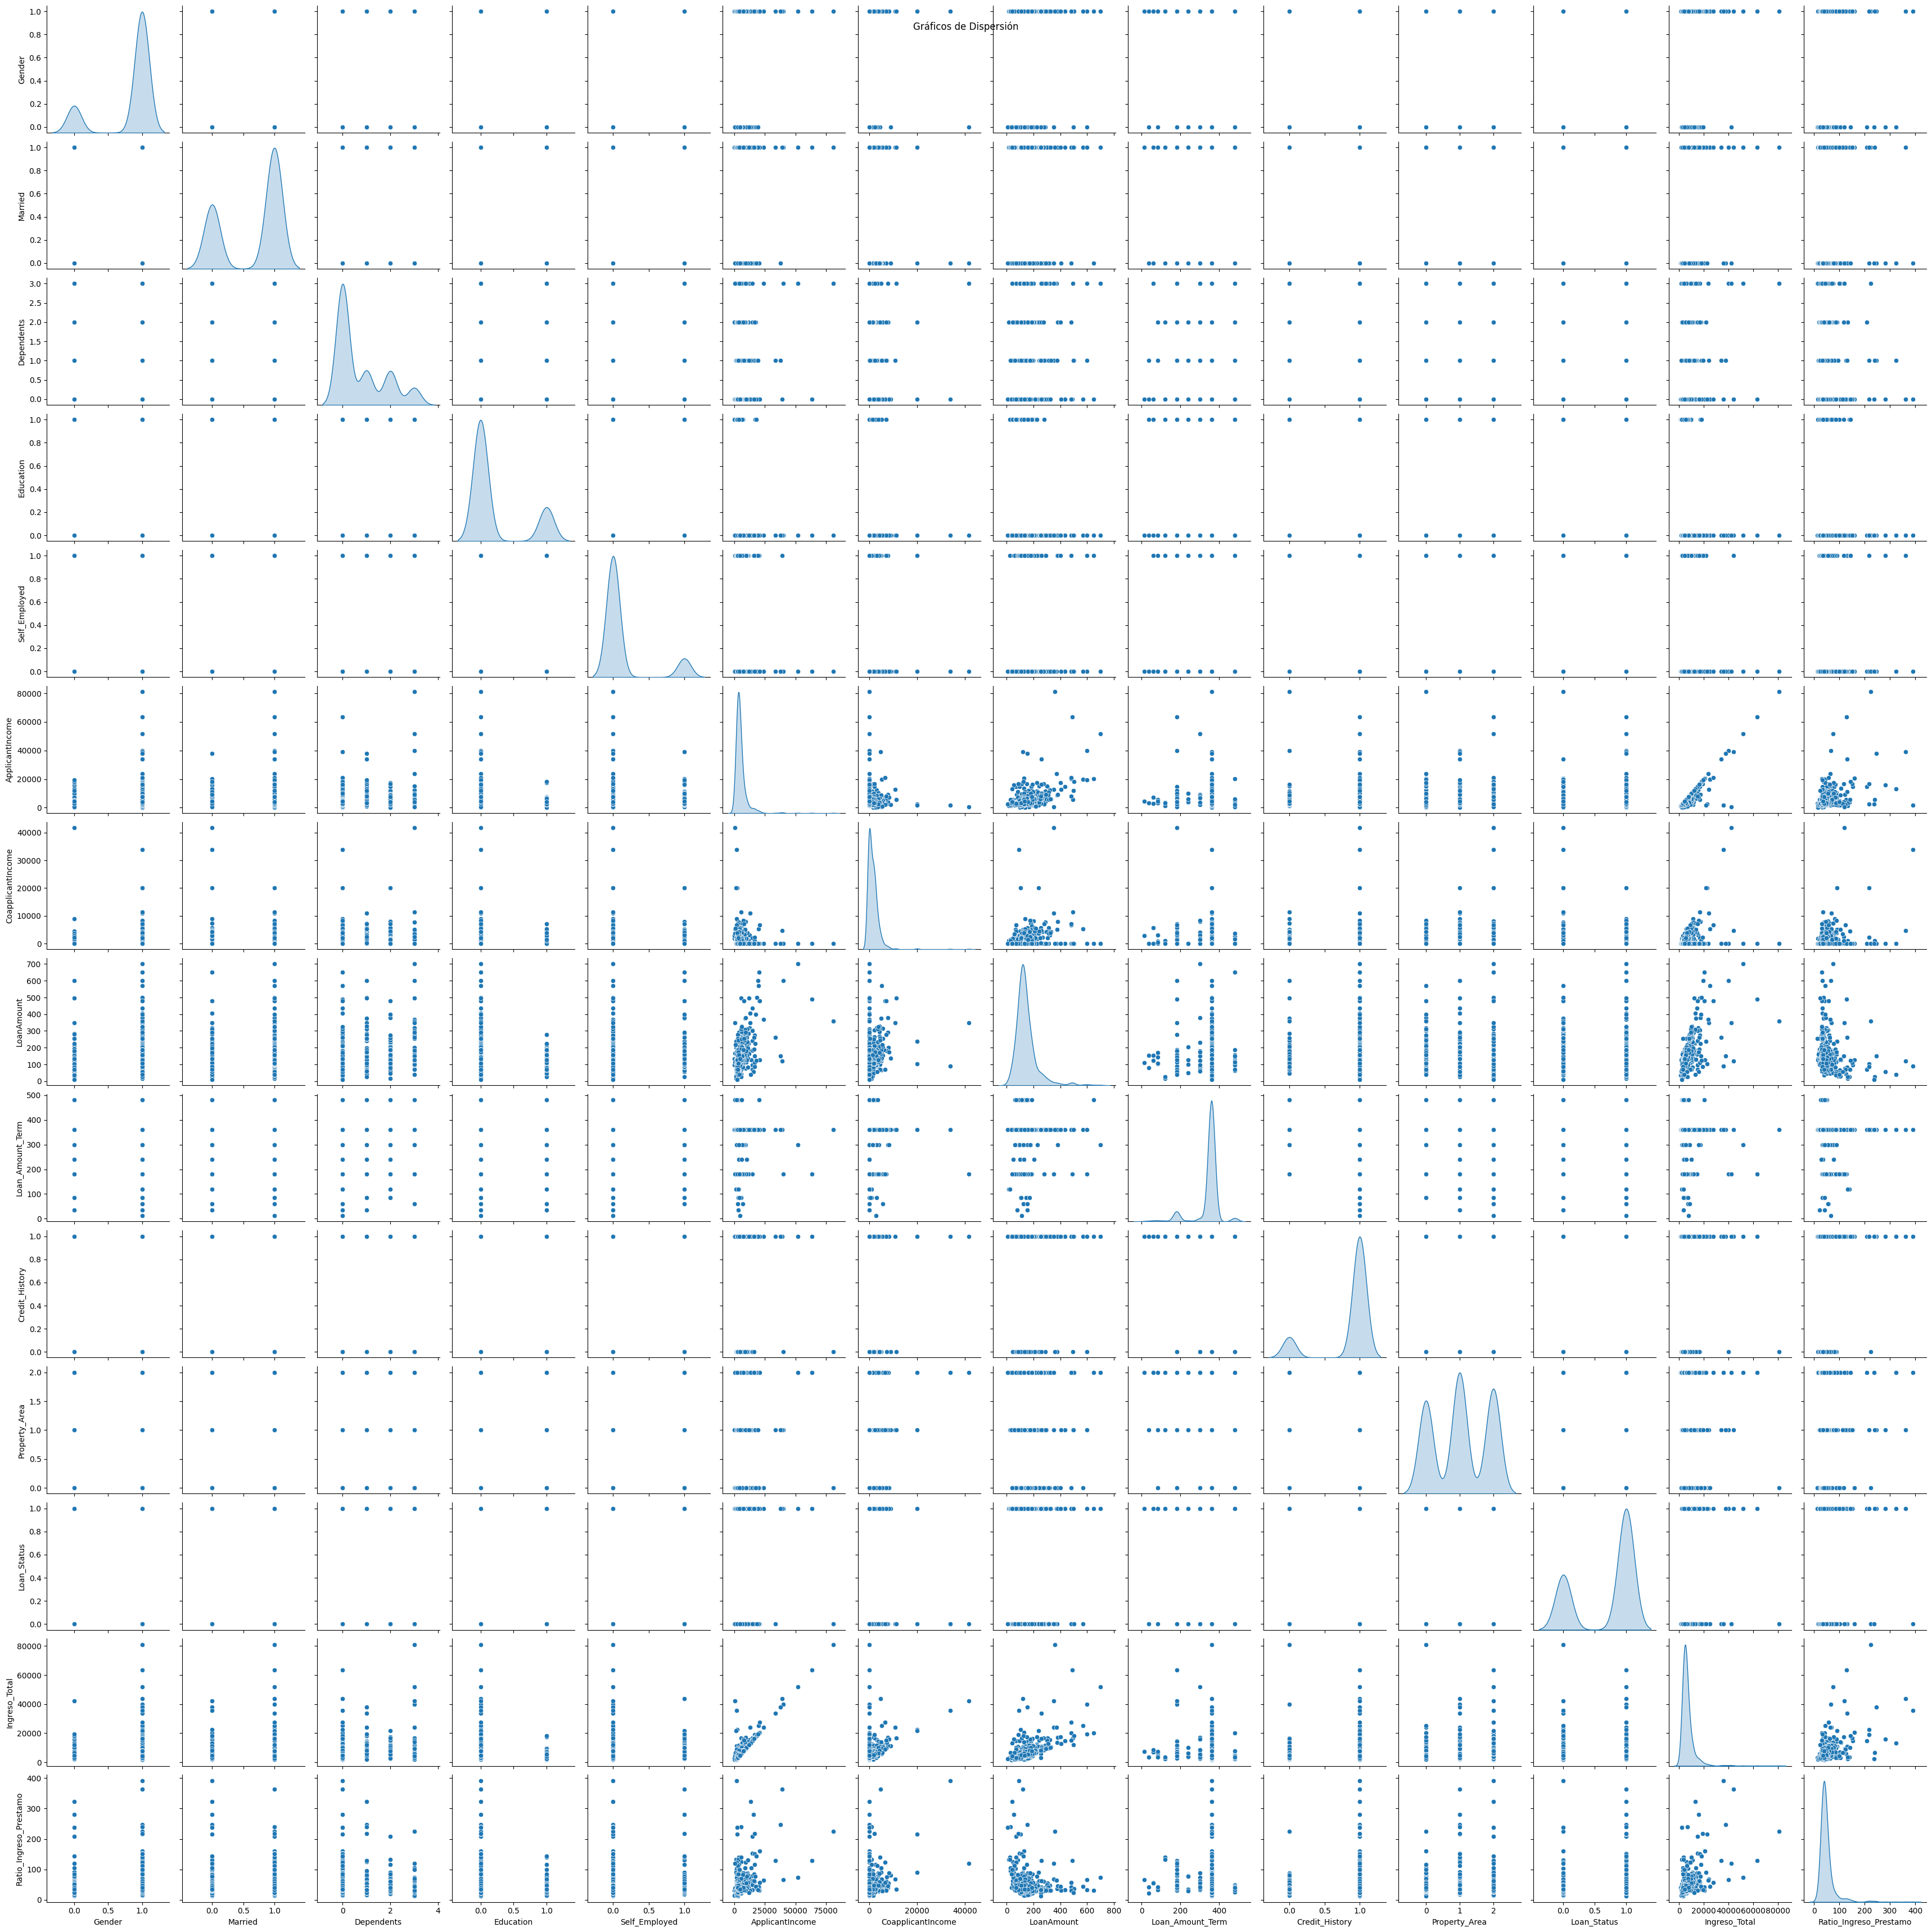

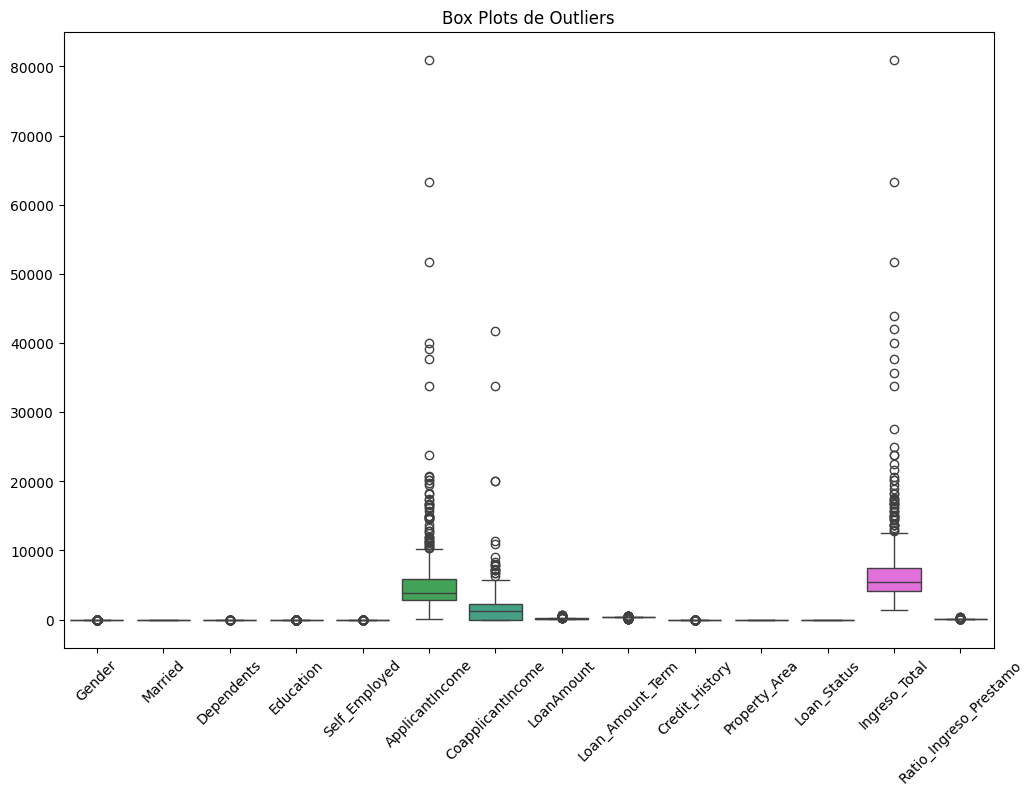

Número de outliers en cada característica:
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            8
CoapplicantIncome          6
LoanAmount                15
Loan_Amount_Term          12
Credit_History             0
Property_Area              0
Loan_Status                0
Ingreso_Total             10
Ratio_Ingreso_Prestamo    11
dtype: int64
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	cv_agg's valid binary_logloss: 0.491613 + 0.0343485

Rendimiento del Modelo:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.88      0.85      0.86        85

    accuracy                           0.81       123
   macro avg       0.78      0.79      0.79       123
weighted avg       0.82      0.81      0.81       123



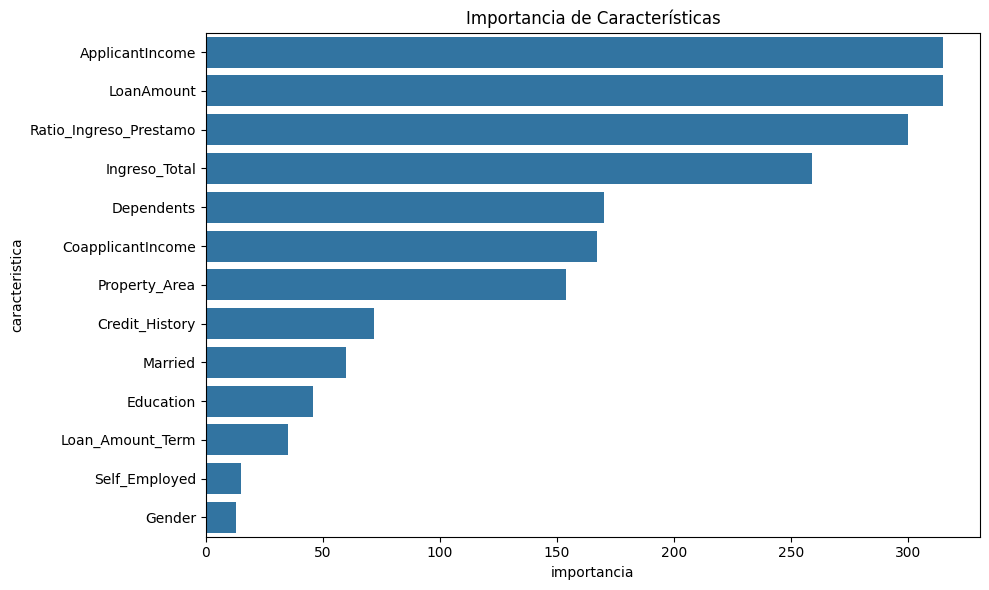

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	cv_agg's valid binary_logloss: 0.491613 + 0.0343485

Rendimiento del Modelo:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.88      0.85      0.86        85

    accuracy                           0.81       123
   macro avg       0.78      0.79      0.79       123
weighted avg       0.82      0.81      0.81       123



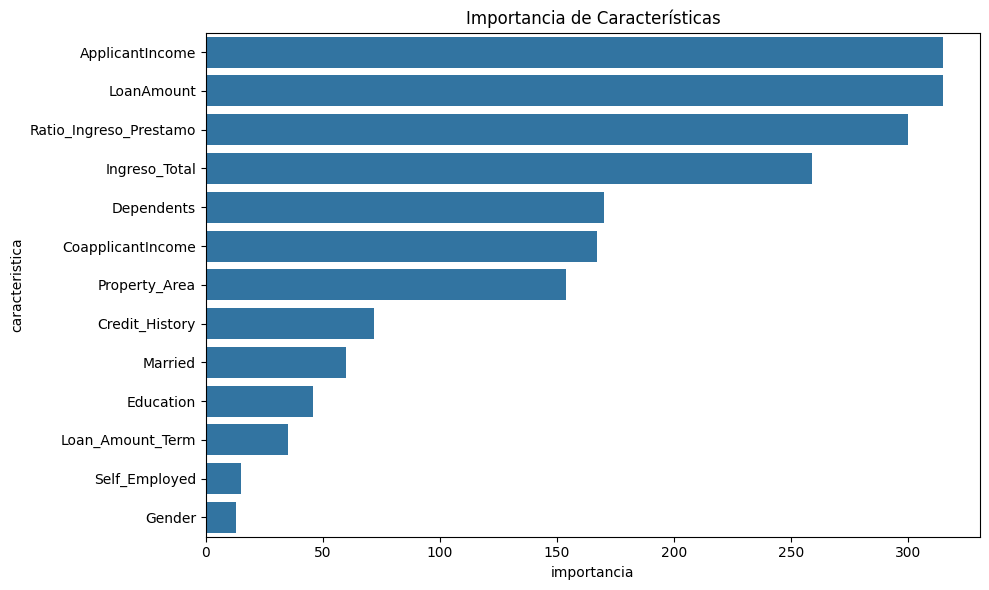

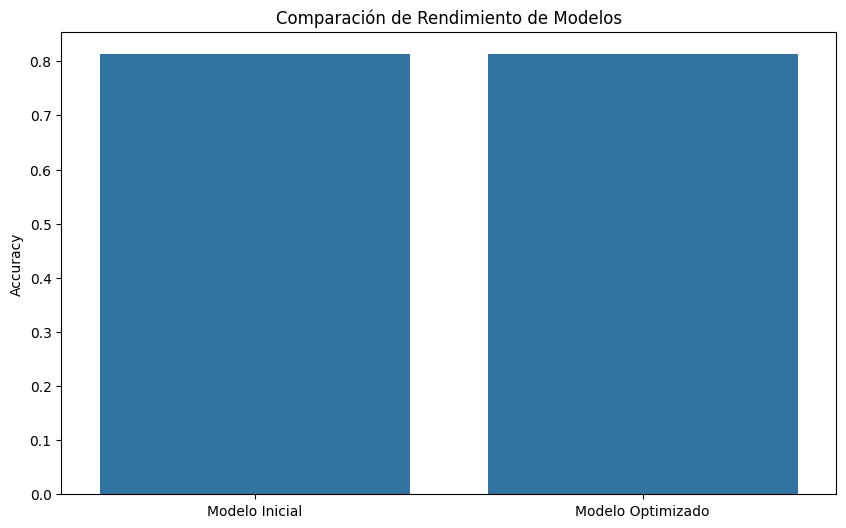

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# Aprendizaje con datos desequilibrados
from imblearn.over_sampling import SMOTE

# LightGBM
import lightgbm as lgb
from lightgbm import early_stopping

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

class AnalisisPrestamos:
    def __init__(self, df):
        """
        Inicializar el pipeline de análisis de préstamos

        Args:
            df (pd.DataFrame): Dataframe de entrada
        """
        self.data = df.copy()
        self.original_data = df.copy()

    def preprocesamiento_integral(self):
        """
        Preprocesamiento integral de datos
        """
        # Eliminar Loan_ID ya que no es útil para la predicción
        self.data.drop('Loan_ID', axis=1, inplace=True)

        # Detectar y tratar valores faltantes con un enfoque más robusto
        # Columnas numéricas
        columnas_numericas = self.data.select_dtypes(include=['int64', 'float64']).columns
        for col in columnas_numericas:
            self.data[col].fillna(self.data[col].median(), inplace=True)

        # Columnas categóricas
        columnas_categoricas = self.data.select_dtypes(include=['object']).columns
        for col in columnas_categoricas:
            self.data[col].fillna(self.data[col].mode()[0], inplace=True)

        # Codificar variables categóricas
        le = LabelEncoder()
        for col in columnas_categoricas:
            if col != 'Loan_Status':
                self.data[col] = le.fit_transform(self.data[col].astype(str))

        # Codificar variable objetivo
        self.data['Loan_Status'] = le.fit_transform(self.data['Loan_Status'])

        return self

    def ingenieria_caracteristicas(self):
        """
        Crear características adicionales
        """
        # Ingreso Total
        self.data['Ingreso_Total'] = self.data['ApplicantIncome'] + self.data['CoapplicantIncome']

        # Ratio de Ingreso a Monto de Préstamo
        self.data['Ratio_Ingreso_Prestamo'] = self.data['Ingreso_Total'] / (self.data['LoanAmount'] + 1)

        return self

    def analisis_estadistico_descriptivo(self):
        """
        Realizar análisis estadístico descriptivo y visualizaciones
        """
        # Estadísticas descriptivas
        print("Estadísticas Descriptivas Básicas:")
        print(self.data.describe())

        # Análisis de la distribución de variables categóricas
        print("\nDistribución de Variables Categóricas:")
        for col in self.data.select_dtypes(include=['object']).columns:
            print(f"\n{col}:\n{self.data[col].value_counts()}")

        # Histogramas
        self.data.hist(bins=20, figsize=(12, 8))
        plt.suptitle('Distribución de Variables Numéricas')
        plt.show()

        # Gráficos de barras
        for col in self.data.select_dtypes(include=['object']).columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, data=self.data)
            plt.title(f'Distribución de {col}')
            plt.show()

        # Mapa de calor de correlaciones
        plt.figure(figsize=(12, 10))
        corr_matrix = self.data.corr(numeric_only=True)
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Mapa de Calor de Correlaciones')
        plt.show()

        # Gráficos de dispersión
        sns.pairplot(self.data, diag_kind='kde')
        plt.suptitle('Gráficos de Dispersión')
        plt.show()

        # Identificación de outliers utilizando Box Plots
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=self.data.select_dtypes(include=['float64', 'int64']))
        plt.title('Box Plots de Outliers')
        plt.xticks(rotation=45)
        plt.show()

        # Método de Z-score para identificar outliers numéricos
        from scipy import stats
        z_scores = stats.zscore(self.data.select_dtypes(include=['float64', 'int64']))
        outliers = (abs(z_scores) > 3).sum(axis=0)
        print(f'Número de outliers en cada característica:\n{outliers}')

        return self

    def entrenar_modelo(self, test_size=0.2, random_state=42):
        """
        Entrenar modelo LightGBM con técnicas avanzadas
        """
        # Preparar características y objetivo
        X = self.data.drop('Loan_Status', axis=1)
        y = self.data['Loan_Status']

        # Dividir los datos
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=random_state
        )

        # Escalar características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Manejar desequilibrio de clases con SMOTE
        smote = SMOTE(random_state=random_state)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Conjunto de datos de LightGBM
        train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)

        # Ajustar hiperparámetros
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': -1,
            'min_data_in_leaf': 20,
            'min_sum_hessian_in_leaf': 0.1,
            'max_depth': 10,
            'min_gain_to_split': 0.01
        }

        # Validación cruzada
        cv_results = lgb.cv(
            params,
            train_data,
            num_boost_round=1000,
            stratified=True,
            nfold=5,
            callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)],
            metrics=['binary_logloss'],
            return_cvbooster=True
        )

        # Entrenar modelo final
        if 'binary_logloss-mean' in cv_results:
            num_round = len(cv_results['binary_logloss-mean'])
        else:
            num_round = 100

        model = lgb.train(params, train_data, num_boost_round=num_round)

        # Predicciones
        y_pred_proba = model.predict(X_test_scaled)
        y_pred = (y_pred_proba > 0.5).astype(int)

        # Evaluación
        print("\nRendimiento del Modelo:")
        print(classification_report(y_test, y_pred))

        # Importancia de características
        importancia_caracteristicas = pd.DataFrame({
            'caracteristica': X.columns,
            'importancia': model.feature_importance()
        }).sort_values('importancia', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importancia', y='caracteristica', data=importancia_caracteristicas)
        plt.title('Importancia de Características')
        plt.tight_layout()
        plt.show()

        return model, importancia_caracteristicas, accuracy_score(y_test, y_pred)

    def comparar_modelos(self):
        """
        Comparar modelo inicial y modelo optimizado
        """
        # Entrenar modelo inicial
        _, _, acc_inicial = self.entrenar_modelo()

        # Optimización de hiperparámetros
        optimized_model, importancia, acc_optimizado = self.entrenar_modelo(test_size=0.2, random_state=42)

        # Crear gráfico de comparación
        modelos = ['Modelo Inicial', 'Modelo Optimizado']
        accuracies = [acc_inicial, acc_optimizado]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=modelos, y=accuracies)
        plt.title('Comparación de Rendimiento de Modelos')
        plt.ylabel('Accuracy')
        plt.show()

        return optimized_model, importancia

def main():
    # Cargar datos desde Google Drive
    URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/train.csv'
    df = pd.read_csv(URL)

    # Inicializar y procesar
    analisis = AnalisisPrestamos(df)
    analisis.preprocesamiento_integral()
    analisis.ingenieria_caracteristicas()
    analisis.analisis_estadistico_descriptivo()

    # Comparar modelos
    modelo, importancia_caracteristicas = analisis.comparar_modelos()

if __name__ == "__main__":
    main()